In [1]:
import pandas as pd
import numpy as np
import random

# JNB Lab Solutions



**Exercise 1a**

1) Read in Homicide data and drop rows that have missing data.

In [2]:
Hom=pd.read_excel('homicides.xlsx') #read data file
Hom=Hom[Hom["Manner of Death"]=='HOMICIDE']
Hom=Hom[["Date of Incident","Age","Gender","Race","Primary Cause","Residence City","Incident Zip Code"]]
Hom=Hom.dropna()
Hom.head(1)

,Date of Incident,Age,Gender,Race,Primary Cause,Residence City,Incident Zip Code
0,2017-02-26 10:48:00,23.0,Male,Black,MULTIPLE GUNSHOT WOUNDS,Chicago,60623.0


2) Extract the month and year of homicide incidents.

In [3]:
from datetime import datetime
Hom['new_date'] = [d.date() for d in Hom['Date of Incident']] 
dates=Hom['new_date'].values
year=[my_str.year for my_str in dates]
month=[my_str.month for my_str in dates]
day=[my_str.day for my_str in dates]
Hom['year'] = year
Hom['month'] = month
Hom['day'] = day
Hom.head(1)

,Date of Incident,Age,Gender,Race,Primary Cause,Residence City,Incident Zip Code,new_date,year,month,day
0,2017-02-26 10:48:00,23.0,Male,Black,MULTIPLE GUNSHOT WOUNDS,Chicago,60623.0,2017-02-26,2017,2,26


3) Get Chicago data, select the columns ["Age","Gender","Race","Primary Cause","Incident Zip Code","year","month","day"]  and use integer format

In [4]:
ChiHom=Hom[Hom["Residence City"]=='Chicago'] #get data for just Chicago
df=ChiHom[["Age","Gender","Race","Primary Cause","Incident Zip Code","year","month","day"]]
df=df.dropna()
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df['Age']=df['Age'].astype(int)
df['Incident Zip Code']=df['Incident Zip Code'].astype(int)
df=df[df["year"]>2014]
df.head(1)

,Age,Gender,Race,Primary Cause,Incident Zip Code,year,month,day
0,23,Male,Black,MULTIPLE GUNSHOT WOUNDS,60623,2017,2,26


4) Get the number of Chicago homicides in July 2020.

In [5]:
july=df[df["month"]==7]
july20=july[july["year"]==2020]
print("Chicago Homicides In July 2020: ",len(july20))

Chicago Homicides In July 2020:  89


5) Get the number of homicides which occured on each day of July between 2015 and 2019.

In [6]:
julydf=july
julydf=julydf.reset_index(drop=True)
julycount=pd.Series(np.arange(0,155,1))
julycount[:]=0
j=0
for year in np.arange(2015,2020,1):
    for day in np.arange(1,32,1):
        for i in julydf.index:
            if julydf.loc[i,"day"]==day and julydf.loc[i,"year"]==year:
                julycount[j]=julycount[j]+1
        j=j+1
print(julycount[0:5])

0    0
1    1
2    3
3    1
4    4
dtype: int32


```{index} frequency distribution
```

6) Get frequency distributions for the number of homicides in a day

In [7]:
jm=julycount.max()
julyfreq=pd.Series(np.arange(0,jm+1,1))  #create a series with index the number of homicides and value equal to the frequency
julyfreq[:]=0
dj=julycount
for i in julycount.index:
    for j in np.arange(0,jm+1,1):
        if dj[i]==j:
            julyfreq[j]=julyfreq[j]+1
s=julyfreq.sum()
julyfreq=julyfreq/s
print(julyfreq)
julyfreq[0]

0    0.200000
1    0.309677
2    0.258065
3    0.141935
4    0.051613
5    0.012903
6    0.012903
7    0.012903
dtype: float64


0.2

```{index} Monte Carlo simulation
```

7) Do a Monte Carlo simulation for monthly homicide counts  in July based on 31 random draws from the respective empirical distributions.

In [8]:
n = random.random()
nummonths=10000
numdays=31*nummonths
julydaytotal=pd.Series(np.arange(0,numdays,1))
julydaytotal[:]=0

for i in np.arange(0,numdays,1):
    x=random.random()
    exit=0
    cum=0
    for j in julyfreq.index:
        if x< cum+julyfreq[j] and exit==0:
            julydaytotal[i]=j
            exit=1
        else:
            cum=cum+julyfreq[j]


julymonths=pd.Series(np.arange(0,nummonths,1))
julymonths[:]=0
i=0
for month in np.arange(0,nummonths,1):
    sum=0
    for j in np.arange(0,31,1):
        sum=sum+julydaytotal[i]
        i=i+1
    julymonths[month]=sum
    month=month+1


8) Make a histogram for July.

Text(0.5, 1.0, '10,000 Simulated July Homicide Counts based on 2015-2019 Data')

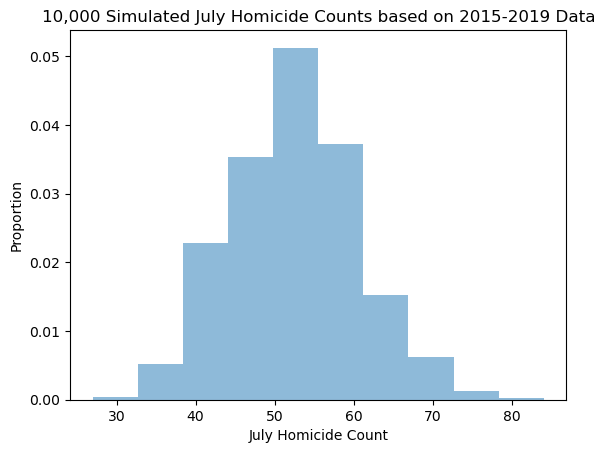

In [9]:
import matplotlib.pyplot as plt
#Make Histogram
fig, ax = plt.subplots()
n,bins,patches = ax.hist(julymonths, bins=10,density=1,alpha=.5)
plt.xlabel("July Homicide Count")
plt.ylabel("Proportion")
plt.title("10,000 Simulated July Homicide Counts based on 2015-2019 Data")

**Exercise 1b**

b) Find the empirical p-value of getting at least 108 homicides (the number in July 2020.)

In [10]:
julycount=julymonths[julymonths>=108]
pjuly=len(julycount)/10000
print("Probaility that a random draw of 31 days from July 2015-2020 distibution results in 85 or more homicides:",pjuly)

Probaility that a random draw of 31 days from July 2015-2020 distibution results in 85 or more homicides: 0.0


**Exercise 2**

a) Make a histogram of the difference July homicide count - May homicide count

In [11]:
maydf=df[df["month"]==5]
maydf=maydf.reset_index(drop=True)
maycount=pd.Series(np.arange(0,155,1))
maycount[:]=0
j=0
for year in np.arange(2015,2020,1):
    for day in np.arange(1,32,1):
        for i in maydf.index:
            if maydf.loc[i,"day"]==day and maydf.loc[i,"year"]==year:
                maycount[j]=maycount[j]+1
        j=j+1
mm=maycount.max()
mayfreq=pd.Series(np.arange(0,mm+1,1))  #create a series with index the number of homicides and value equal to the frequency
mayfreq[:]=0
dm=maycount
for i in maycount.index:
    for j in np.arange(0,mm+1,1):
        if dm[i]==j:
            mayfreq[j]=mayfreq[j]+1
s=mayfreq.sum()
mayfreq=mayfreq/s
n = random.random()
nummonths=10000
numdays=31*nummonths
maydaytotal=pd.Series(np.arange(0,numdays,1))
maydaytotal[:]=0

for i in np.arange(0,numdays,1):
    x=random.random()
    exit=0
    cum=0
    for j in mayfreq.index:
        if x< cum+mayfreq[j] and exit==0:
            maydaytotal[i]=j
            exit=1
        else:
            cum=cum+mayfreq[j]


maymonths=pd.Series(np.arange(0,nummonths,1))
maymonths[:]=0
i=0
for month in np.arange(0,nummonths,1):
    sum=0
    for j in np.arange(0,31,1):
        sum=sum+maydaytotal[i]
        i=i+1
    maymonths[month]=sum
    month=month+1


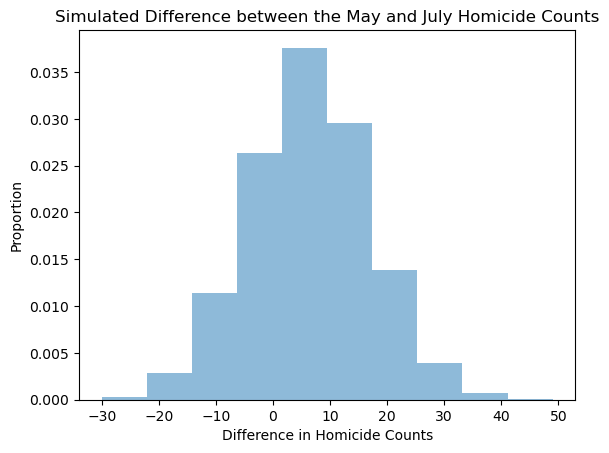

In [12]:
diff=julymonths-maymonths
import matplotlib.pyplot as plt
#Make Histogram
fig, ax = plt.subplots()
n,bins,patches = ax.hist(diff, bins=10,density=1,alpha=.5)
plt.xlabel("Difference in Homicide Counts")
plt.ylabel("Proportion")
plt.title("Simulated Difference between the May and July Homicide Counts")
plt.savefig("Diff.png")

Find the probability that July will have at least n more homicides than May $(0\le n \le 20)$.

In [13]:
pdiff=pd.Series(np.arange(0,21,1))
for i in pdiff.index:
    pdiff.loc[i]=len(diff[diff>=i])/10000
pdiff

0     0.7409
1     0.7091
2     0.6766
3     0.6436
4     0.6077
5     0.5694
6     0.5298
7     0.4885
8     0.4529
9     0.4168
10    0.3796
11    0.3436
12    0.3082
13    0.2773
14    0.2459
15    0.2171
16    0.1889
17    0.1677
18    0.1461
19    0.1246
20    0.1045
dtype: float64

b) Make a plot of these probabilities

<IPython.core.display.Javascript object>


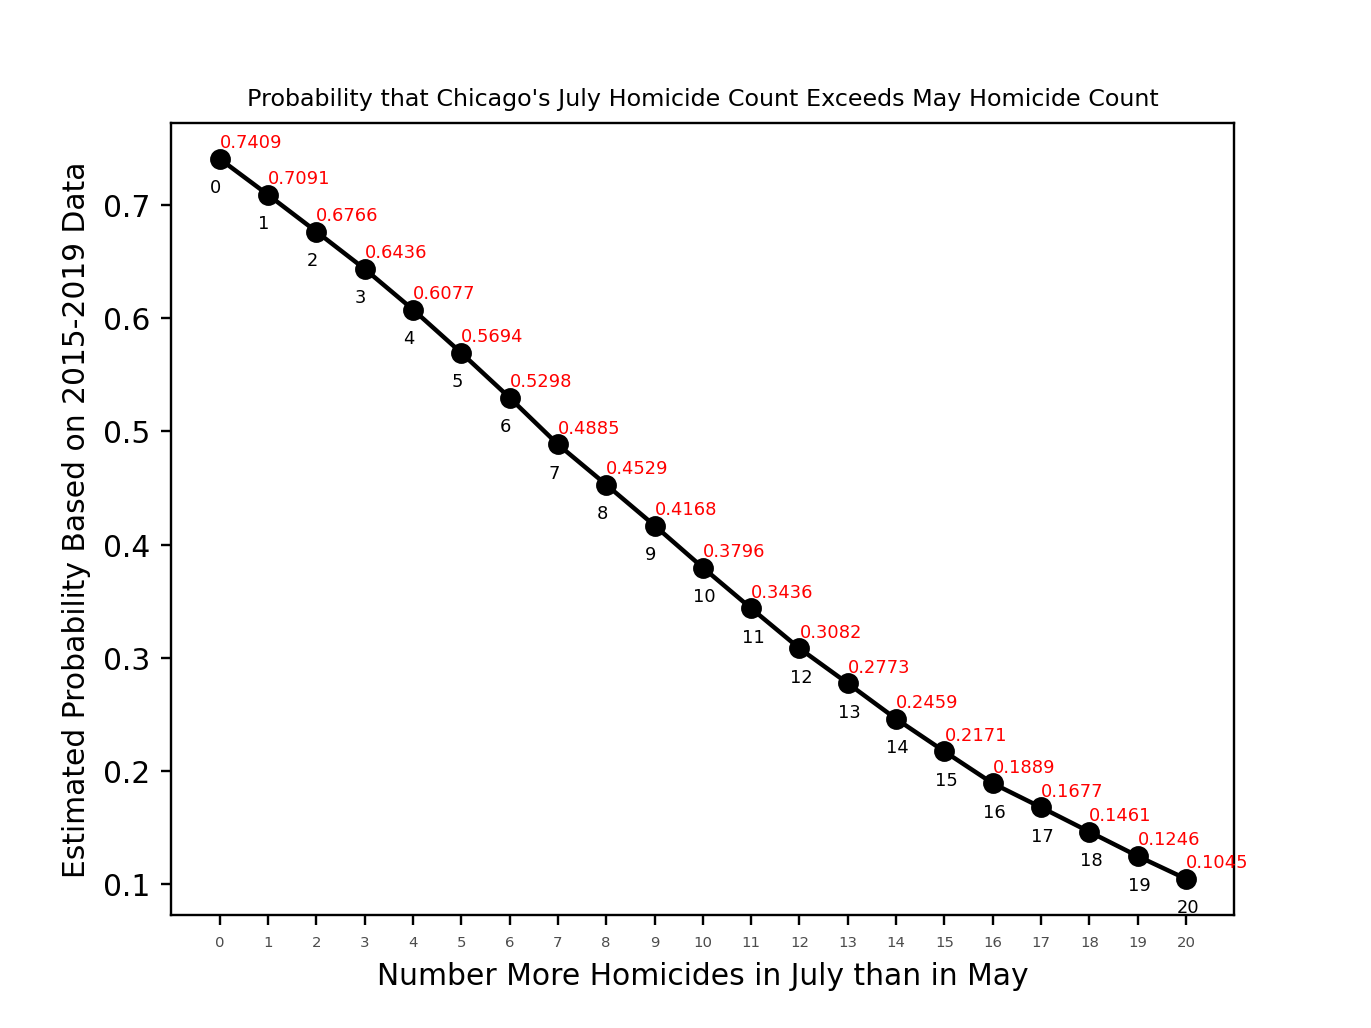

In [15]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(pdiff, 'o-',color='k')
for i in pdiff.index:
    plt.text(i,pdiff[i]+.01, str(pdiff[i]),color='r',size=6)
    plt.text(i-.2,pdiff[i]-.03, str(i),color='k',size=6)
    
plt.xlabel("Number More Homicides in July than in May")
plt.ylabel("Estimated Probability Based on 2015-2019 Data")
xl = np.arange(21)
plt.xticks(xl, xl, alpha=0.7,size=5)
plt.title("Probability that Chicago's July Homicide Count Exceeds May Homicide Count",size=8)
plt.savefig("MayvsJuly.png")

c) Based on 2015-2019 data, there is a 10% chance of 20 more homicides in July than May.